In [45]:
# =========================================
# 💰 LOAN APPROVAL PREDICTION PROJECT
# =========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [47]:
# =========================================
# Step 2: Load Dataset
# =========================================
data = pd.read_csv("C:/Users/PC/OneDrive/Documents/DOMAIN KNOWLEDGE PROJECT/archive/train data.csv")  # Replace with your actual file name
print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
data.head()

✅ Dataset Loaded Successfully!
Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


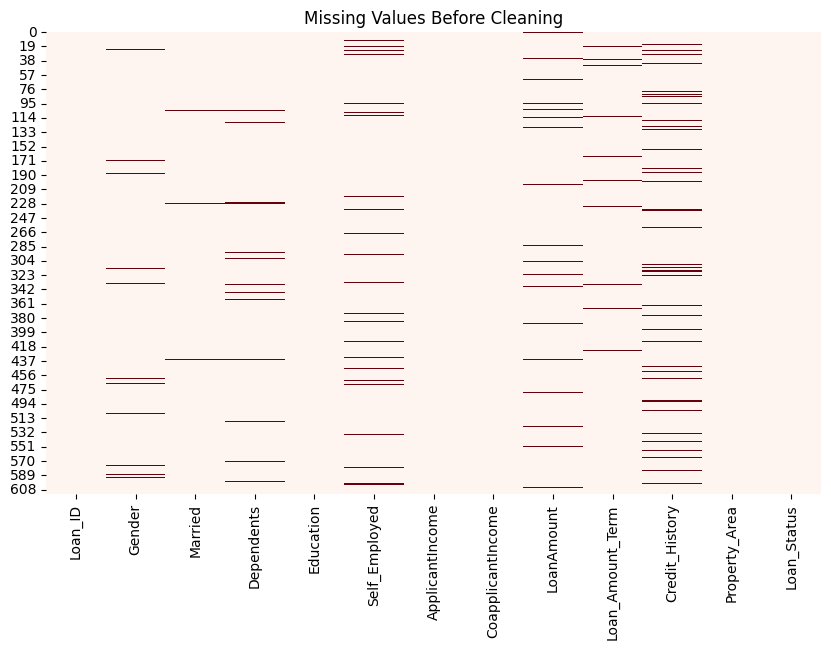

In [48]:
# =========================================
# Step 3: Visualize Missing Values (Before Cleaning)
# =========================================
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Before Cleaning")
plt.show()

In [49]:
# =========================================
# Step 4: Handle Missing Values
# =========================================
data.fillna({
    'Gender': data['Gender'].mode()[0],
    'Married': data['Married'].mode()[0],
    'Dependents': data['Dependents'].mode()[0],
    'Self_Employed': data['Self_Employed'].mode()[0],
    'LoanAmount': data['LoanAmount'].median(),
    'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],
    'Credit_History': data['Credit_History'].mode()[0]
}, inplace=True)

# ✅ FIX: Convert '3+' in Dependents column to numeric
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

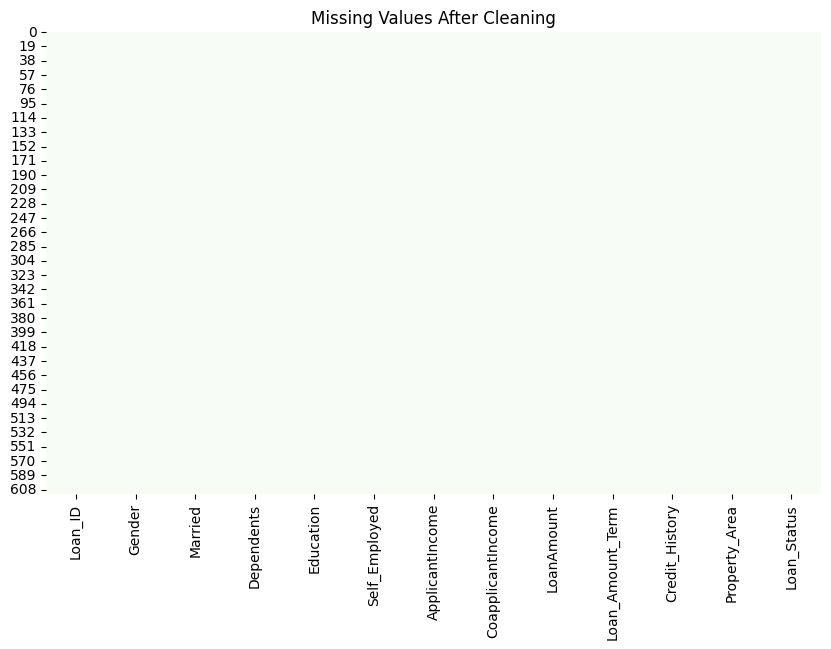

In [50]:
# =========================================
# Step 5: Visualize Missing Values (After Cleaning)
# =========================================
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values After Cleaning")
plt.show()

In [51]:
# =========================================
# Step 6: Encode Categorical Columns
# =========================================
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [52]:
# =========================================
# Step 7: Split Features and Target
# =========================================
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
# =========================================
# Step 8: Feature Scaling
# =========================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# ====================================
# MODEL 1: Logistic Regression
# ====================================
print("\n🔹 Logistic Regression Model")
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression Model
Accuracy: 0.7837837837837838
Confusion Matrix:
 [[ 27  38]
 [  2 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


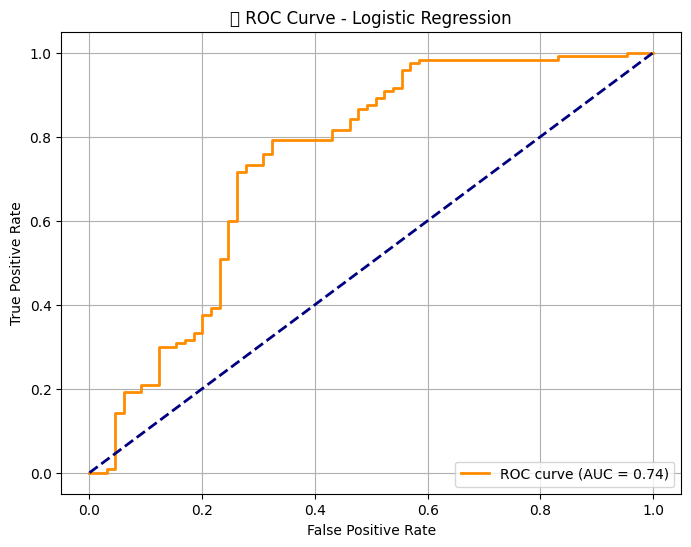

🔹 AUC Score: 0.7446


In [55]:
# =========================================
# Step 9: ROC Curve & AUC Score
# =========================================
y_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"🔹 AUC Score: {roc_auc:.4f}")

In [56]:
from sklearn.svm import SVC

print("\n🔹 Support Vector Machine Model")
svm_model = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



🔹 Support Vector Machine Model
Accuracy: 0.7891891891891892
[[ 27  38]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.96      0.42      0.58        65
           1       0.76      0.99      0.86       120

    accuracy                           0.79       185
   macro avg       0.86      0.70      0.72       185
weighted avg       0.83      0.79      0.76       185



In [57]:
from sklearn.naive_bayes import GaussianNB

print("\n🔹 Naive Bayes Model")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



🔹 Naive Bayes Model
Accuracy: 0.7837837837837838
[[ 29  36]
 [  4 116]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.59        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.71      0.72       185
weighted avg       0.80      0.78      0.76       185



In [58]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes'],
    'Accuracy': [0.7838, 0.7891, 0.7838],
    'Recall (1)': [0.98, 0.99, 0.97],
    'F1-score (1)': [0.86, 0.86, 0.85]
})
print(comparison)


                 Model  Accuracy  Recall (1)  F1-score (1)
0  Logistic Regression    0.7838        0.98          0.86
1                  SVM    0.7891        0.99          0.86
2          Naive Bayes    0.7838        0.97          0.85


In [59]:
# =========================================
# Step 9: Interpret Coefficients
# =========================================
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
coeff_df['Odds_Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print("\n🔍 Feature Coefficients and Odds Ratios:\n", coeff_df)


🔍 Feature Coefficients and Odds Ratios:
               Feature  Coefficient  Odds_Ratio
9      Credit_History     1.313711    3.719951
1             Married     0.285411    1.330309
2          Dependents     0.162261    1.176167
8    Loan_Amount_Term     0.095071    1.099736
10      Property_Area     0.039257    1.040037
4       Self_Employed     0.020450    1.020660
6   CoapplicantIncome    -0.053277    0.948117
5     ApplicantIncome    -0.064107    0.937905
7          LoanAmount    -0.082713    0.920615
3           Education    -0.114080    0.892187
0              Gender    -0.128089    0.879775


C:\Users\PC\AppData\Local\Temp\ipykernel_12700\301965438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
C:\Users\PC\AppData\Local\Temp\ipykernel_12700\301965438.py:9: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


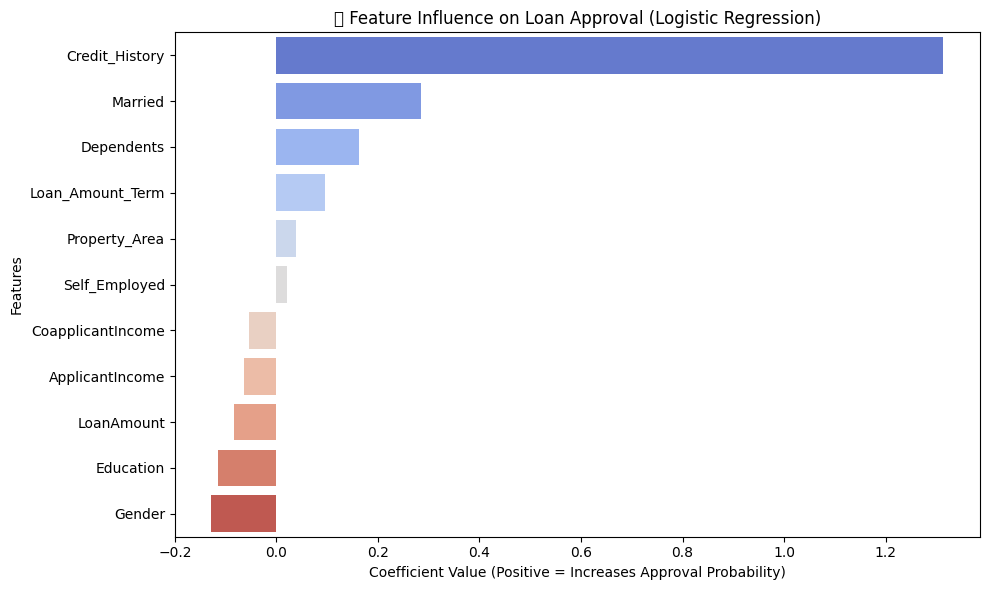

In [60]:
# =========================================
# Step 10: Visualize Feature Influence
# =========================================
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title("🔎 Feature Influence on Loan Approval (Logistic Regression)")
plt.xlabel("Coefficient Value (Positive = Increases Approval Probability)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [61]:

# =========================================
print("\n Final Model Selected: Logistic Regression")
print("Reason: Strong recall, interpretability, and transparency — ideal for financial applications.")


 Final Model Selected: Logistic Regression
Reason: Strong recall, interpretability, and transparency — ideal for financial applications.
